In [1]:
!pip install yfinance matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.013718,85.971745,81.228301,85.049052,559863000
2024-05-02,85.788811,86.208671,83.172666,84.421256,377898000
2024-05-03,88.759834,89.251669,87.011408,87.760163,398341000
2024-05-06,92.109726,92.189701,89.025740,89.360629,376203000
2024-05-07,90.524254,91.750848,88.981761,91.068074,437342000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.748871,95.168731,93.409315,93.719210,318764000
2024-05-21,95.354668,95.368663,93.149391,93.568252,328946000
2024-05-22,94.918808,95.988456,93.218370,95.427643,548648000
2024-05-23,103.764908,106.285076,101.486649,101.994486,835065000
2024-05-24,106.434021,106.440016,102.966159,104.414680,429494000


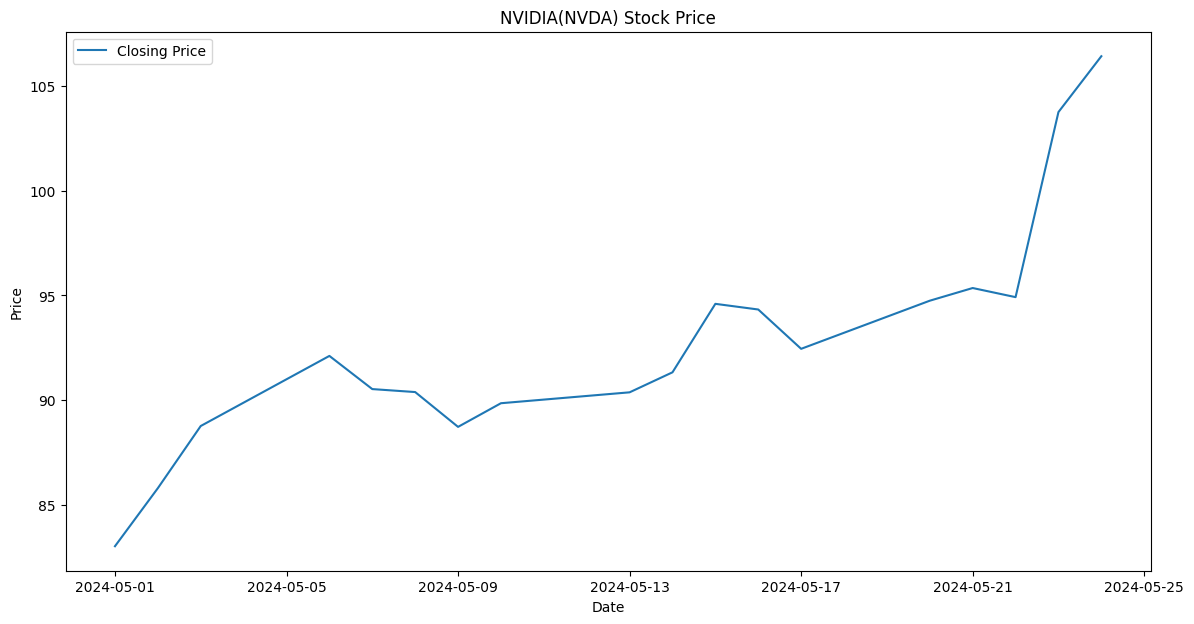

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [7]:
df.head()

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.013718,85.971745,81.228301,85.049052,559863000
2024-05-02,85.788811,86.208671,83.172666,84.421256,377898000
2024-05-03,88.759834,89.251669,87.011408,87.760163,398341000
2024-05-06,92.109726,92.189701,89.025740,89.360629,376203000
2024-05-07,90.524254,91.750848,88.981761,91.068074,437342000


In [8]:
from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.01371765136719,85.9717451202874,81.22830132116862,85.04905184528752,559863000
2024-05-02,85.78881072998047,86.20867093085921,83.17266601309362,84.42125626969049,377898000
2024-05-03,88.75983428955078,89.25166943381491,87.01140828668458,87.76016278941914,398341000
2024-05-06,92.10972595214844,92.18970149787158,89.02574047227303,89.36062948973989,376203000
2024-05-07,90.52425384521484,91.75084815179432,88.98176145323684,91.06807385977748,437342000
2024-05-08,90.38229370117188,91.16403442191073,89.39061527356014,89.45359811099952,325721000
2024-05-09,88.71784973144531,91.04208295679378,88.20202038816478,90.4992620554592,378013000
2024-05-10,89.84847259521484,91.3709748992257,89.19768547851668,90.2753342742342,335325000
2024-05-13,90.36930847167969,90.96811074029578,88.49991996993283,90.44827727503778,289680000
2024-05-14,91.32599639892578,91.62089767401247,88.90478722070216,89.56956971282393,296507000
2024-05-15,9

In [9]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 요약하고 주가에 대한 의견을 줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

## 엔비디아(NVDA) 주가 분석

제공된 데이터에 따르면, 엔비디아의 주가는 2024년 5월 초부터 중순까지 상승세를 보이다가, 5월 23일과 24일에 급격한 상승을 경험했습니다. 

**주요 관찰 사항:**

* **상승 추세:** 전반적으로 주가는 상승 추세를 유지하고 있습니다. 특히 5월 23일 이후 급격한 상승이 두드러집니다.
* **거래량 증가:** 5월 22일과 24일에 거래량이 급증했습니다. 이는 투자자들의 관심 증가와 함께 주가 상승에 영향을 미쳤을 가능성이 높습니다.
* **변동성:** 주가는 비교적 안정적이지만, 일부 날짜에는 변동성이 존재합니다. 특히 5월 15일과 20일에는 가격 변동이 다소 큰 편이었습니다.

**주가에 대한 의견:**

엔비디아의 최근 주가 상승은 긍정적인 신호를 보여줍니다. 인공지능, 머신러닝, 데이터 분석 등 GPU 수요 증가에 힘입어 엔비디아는 꾸준히 성장해왔으며, 이러한 추세는 당분간 지속될 것으로 예상됩니다. 

**다만, 다음과 같은 점들을 고려해야 합니다:**

* **고가 형성:** 최근 주가는 높은 수준에 도달했습니다. 투자 전, 잠재적인 과열 가능성과 가격 조정의 위험성을 고려해야 합니다.
* **시장 변동성:** 기술주들은 일반적으로 시장 변동에 민감하게 반응합니다. 글로벌 경제 상황과 금리 변동 등을 면밀히 살펴야 합니다.

**결론적으로, 엔비디아의 주가는 상승 추세를 보이고 있지만 투자 전 철저한 분석이 필요합니다.**  기술적 분석과 기본적 분석을 통해 투자 전략을 수립하고, 위험 관리에도 유의해야 합니다.
